In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [56]:
# load_digits 데이터 준비
from sklearn.datasets import load_digits

# load_digits, feature, lebel 데이터 변수 할당
digits = load_digits()
digits_data = digits.data
digits_label = digits.target


In [57]:
'''
digits_data는 1797개의 저장된 데이터와 64개의 fixel값(feature)이 있다.
digits_label는 1797개의 저장된 label(target) 데이터가 있다.
'''
print('digits_data:  ', digits_data.shape, '\ndigits_label: ', digits_label.shape)

digits_data:   (1797, 64) 
digits_label:  (1797,)


In [58]:
'''
digits_data의 0번째 64개의 fixel 값
'''
print('digits_data의 0번째 64개의 fixel 값')
print(digits_data[0],'\n')

'''
digits_label을 20개의 데이터 출력으로 0 ~ 9까지 저장되었음을 확인
'''
print('digits_label 20개 출력')
print(digits_label[:20])
digits_name = digits.target_names
print('target의 항목')
print(digits_name)
# digits_data의 0번째 64개의 fixel 값

digits_data의 0번째 64개의 fixel 값
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

digits_label 20개 출력
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
target의 항목
[0 1 2 3 4 5 6 7 8 9]


In [59]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [60]:
'''
dataset split
전체 1797개의 데이터 중 x_train에 1437개 x_test에 360개씩 split
설정한 대로 80%의 데이터는 train 데이터셋에, 나머지 20%의 데이터는 test 데이터셋
'''
x_train, x_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=7)
print('<x_train, x_test, y_train, y_test>에 할당된 데이터')
print('x_train:',x_train.shape, ', x_test:',x_test.shape)
print('y_train:',y_train.shape, ',    y_test:',y_test.shape,'\n')
print('또한, split을 통해 섞여있는 것을 알 수 있다')
print(y_train)

<x_train, x_test, y_train, y_test>에 할당된 데이터
x_train: (1437, 64) , x_test: (360, 64)
y_train: (1437,) ,    y_test: (360,) 

또한, split을 통해 섞여있는 것을 알 수 있다
[2 2 2 ... 1 3 3]


In [61]:
'''
다양한 model로 학습시키기
'''
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # Support Vector Machine
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression

decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC()
sgd_model = SGDClassifier()
logistic_model = LogisticRegression()


In [62]:
'''
# Decision Tree
'''
decision_tree.fit(x_train, y_train)
y_predDT = decision_tree.predict(x_test)
accuracy = classification_report(y_test, y_predDT)
matrix = confusion_matrix(y_test, y_predDT)

print('                     <classification_report>')
print(accuracy)


                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

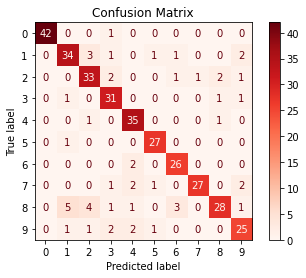

In [63]:
'''
decision_tree visualization
'''
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot = plot_confusion_matrix(decision_tree,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [64]:
'''
# Random Forest
'''
random_forest.fit(x_train, y_train)
y_predRF = random_forest.predict(x_test)
accuracy = classification_report(y_test, y_predRF)
matrix = confusion_matrix(y_test, y_predRF)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

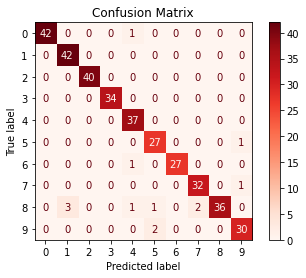

In [65]:
'''
random forest visualization
'''
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot = plot_confusion_matrix(random_forest,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [66]:
'''
# SVM
'''
svm_model.fit(x_train, y_train)
y_predSVM = svm_model.predict(x_test)
accuracy = classification_report(y_test, y_predSVM)
matrix = confusion_matrix(y_test, y_predSVM)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

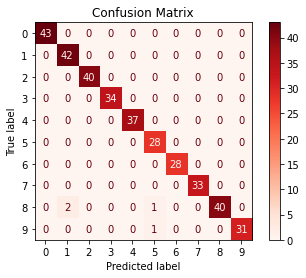

In [67]:
'''
SVM visualization
'''
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot = plot_confusion_matrix(svm_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [68]:
'''
# SGD
'''
sgd_model.fit(x_train, y_train)
y_predSGD = sgd_model.predict(x_test)
accuracy = classification_report(y_test, y_predSGD)
matrix = confusion_matrix(y_test, y_predSGD)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.82      0.95      0.88        42
           2       0.97      0.97      0.97        40
           3       0.89      0.94      0.91        34
           4       1.00      1.00      1.00        37
           5       0.96      0.93      0.95        28
           6       1.00      0.93      0.96        28
           7       0.97      0.97      0.97        33
           8       0.92      0.84      0.88        43
           9       0.93      0.88      0.90        32

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

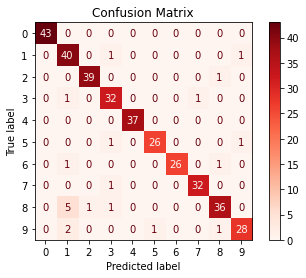

In [69]:
'''
SGD visualization
'''
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot = plot_confusion_matrix(sgd_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [70]:
'''
# Logistic Regression
'''
logistic_model.fit(x_train, y_train)
y_predLOG = logistic_model.predict(x_test)
accuracy = classification_report(y_test, y_predLOG)
matrix = confusion_matrix(y_test, y_predLOG)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

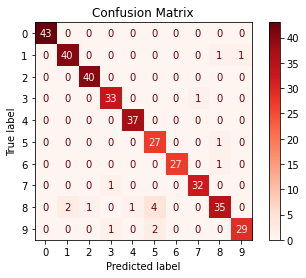

In [71]:
'''
logistic visualization
'''
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot = plot_confusion_matrix(logistic_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [72]:
'''
wine
'''

'\nwine\n'

In [73]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_data = wine.data
wine_label = wine.target

In [74]:
'''
wine_data 178개의 저장된 데이터와 13개의 feature가 있다.
wine_label 178개의 저장된 label(target) 데이터가 있다.
'''
print('wine_data:  ', wine_data.shape, '\nwine_label: ', wine_label.shape)

wine_data:   (178, 13) 
wine_label:  (178,)


In [75]:
'''
wine_data 0번째 13개의 feature 값
'''
print('digits_data의 0번째 13개의 feature 값')
print(wine_data[0],'\n')

'''
wine_label을 3개의 class로 저장된 label
'''
print('wine_label')
print(wine_label[:])
print('저장된 3개의 class',wine.target_names,'\n')
print('13개의 feature 항목')
print(wine.feature_names)


digits_data의 0번째 13개의 feature 값
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] 

wine_label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
저장된 3개의 class ['class_0' 'class_1' 'class_2'] 

13개의 feature 항목
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [76]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [77]:
'''
dataset split
전체 178개의 데이터 중 x_train에 142개 x_test에 36개씩 split
설정한 대로 80%의 데이터는 train 데이터셋에, 나머지 20%의 데이터는 test 데이터셋
'''
x_train, x_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=7)
print('<x_train, x_test, y_train, y_test>에 할당된 데이터')
print('x_train:',x_train.shape, ', x_test:',x_test.shape)
print('y_train:',y_train.shape, ',    y_test:',y_test.shape,'\n')
print('또한, split을 통해 섞여있는 것을 알 수 있다')
print(y_train)

<x_train, x_test, y_train, y_test>에 할당된 데이터
x_train: (142, 13) , x_test: (36, 13)
y_train: (142,) ,    y_test: (36,) 

또한, split을 통해 섞여있는 것을 알 수 있다
[2 2 0 2 0 1 2 2 1 0 0 1 1 1 1 1 0 0 1 1 1 0 2 0 2 1 2 0 2 1 1 1 0 1 0 0 2
 0 2 1 1 2 1 0 1 1 1 1 0 0 0 1 1 2 1 0 1 2 0 1 0 2 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 2 2 0 0 0 2 0 0 1 2 1 1 0 0 2 0 2 2 2 1 2 1 2 1 0 0 2 1 2 1 1 0 1 2 1
 2 0 0 2 0 1 2 0 1 0 0 0 0 1 0 2 1 1 2 0 1 1 1 0 2 1 1 2 1 0 2]


In [85]:
'''
다양한 model로 학습시키기

앞서 각종 모델에 적용시켰으니 바로 학습으로 넘어가자.
'''
# Decision Tree

decision_tree.fit(x_train, y_train)
y_predDT = decision_tree.predict(x_test)
accuracy = classification_report(y_test, y_predDT)
matrix = confusion_matrix(y_test, y_predDT)

print('                     <classification_report>')
print(accuracy)


                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

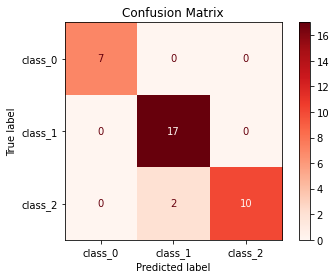

In [86]:
'''
Decision Tree visualization
'''
label=['class_0', 'class_1', 'class_2']
plot = plot_confusion_matrix(decision_tree,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [87]:
'''
# Random Forest
'''
random_forest.fit(x_train, y_train)
y_predRF = random_forest.predict(x_test)
accuracy = classification_report(y_test, y_predRF)
matrix = confusion_matrix(y_test, y_predRF)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

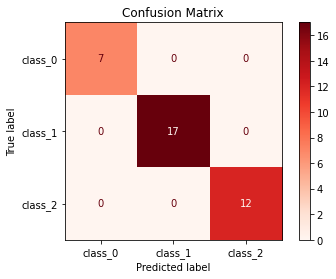

In [88]:
'''
Random Forest visualization
'''
label=['class_0', 'class_1', 'class_2']
plot = plot_confusion_matrix(random_forest,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [89]:
'''
# SVM
'''
svm_model.fit(x_train, y_train)
y_predSVM = svm_model.predict(x_test)
accuracy = classification_report(y_test, y_predSVM)
matrix = confusion_matrix(y_test, y_predSVM)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

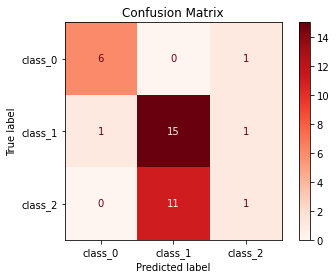

In [90]:
'''
SVM visualization
'''
label=['class_0', 'class_1', 'class_2']
plot = plot_confusion_matrix(svm_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [93]:
'''
# SGD
'''
sgd_model.fit(x_train, y_train)
y_predSGD = sgd_model.predict(x_test)
accuracy = classification_report(y_test, y_predSGD)
matrix = confusion_matrix(y_test, y_predSGD)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.55      0.94      0.70        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.47      0.60      0.52        36
weighted avg       0.43      0.61      0.50        36



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

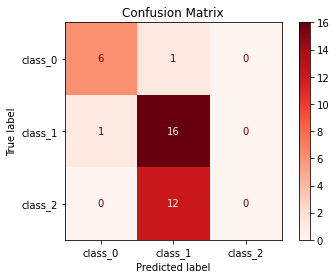

In [94]:
'''
SGD visualization
'''
label=['class_0', 'class_1', 'class_2']
plot = plot_confusion_matrix(sgd_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [95]:
'''
# Logistic Regression
'''
logistic_model.fit(x_train, y_train)
y_predLOG = logistic_model.predict(x_test)
accuracy = classification_report(y_test, y_predLOG)
matrix = confusion_matrix(y_test, y_predLOG)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

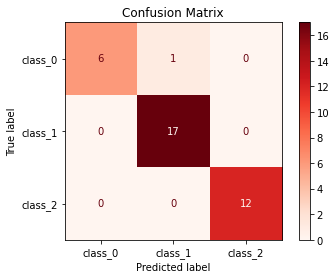

In [96]:
'''
Logistic visualization
'''
label=['class_0', 'class_1', 'class_2']
plot = plot_confusion_matrix(logistic_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [97]:
'''
breat cancer
'''

'\nbreat cancer\n'

In [105]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_label = cancer.target

In [106]:
'''
cancer_data는 569개의 저장된 데이터와 30개의 feature가 있다.
cancer_laber는 569개의 저장된 label(target) 데이터가 있다.
'''
print('cancer_data:  ', cancer_data.shape, '\ncancer_laber: ', cancer_label.shape)

cancer_data:   (569, 30) 
cancer_laber:  (569,)


In [112]:
'''
cancer_data의 0번째 30개의 feature 값
'''
print('cancer_data의 0번째 13개의 feature 값')
print(cancer_data[0],'\n')

'''
cancer_label 2개의 클래스에 저장된 569개의 데이터
'''
print('cancer_label')
print(cancer_label[:])
print('저장된 2개의 class',cancer.target_names,'\n')
print('30개의 feature 항목')
print(cancer.feature_names)


cancer_data의 0번째 13개의 feature 값
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 

cancer_label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 

In [113]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [114]:
'''
dataset split
전체 56개의 데이터 중 x_train에 455개 x_test에 114개씩 split
설정한 대로 80%의 데이터는 train 데이터셋에, 나머지 20%의 데이터는 test 데이터셋
'''
x_train, x_test, y_train, y_test = train_test_split(cancer_data,
                                                    cancer_label,
                                                    test_size=0.2,
                                                    random_state=7)
print('<x_train, x_test, y_train, y_test>에 할당된 데이터')
print('x_train:',x_train.shape, ', x_test:',x_test.shape)
print('y_train:',y_train.shape, ',    y_test:',y_test.shape,'\n')
print('또한, split을 통해 섞여있는 것을 알 수 있다')
print(y_train)

<x_train, x_test, y_train, y_test>에 할당된 데이터
x_train: (455, 30) , x_test: (114, 30)
y_train: (455,) ,    y_test: (114,) 

또한, split을 통해 섞여있는 것을 알 수 있다
[0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 

In [116]:
'''
다양한 model로 학습시키기

앞서 각종 모델에 적용시켰으니 바로 학습으로 넘어가자.
'''
# Decision Tree

decision_tree.fit(x_train, y_train)
y_predDT = decision_tree.predict(x_test)
accuracy = classification_report(y_test, y_predDT)
matrix = confusion_matrix(y_test, y_predDT)

print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

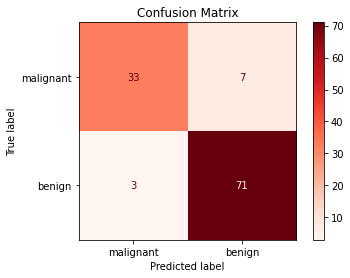

In [118]:
'''
Decision Tree visualization
'''
label=['malignant', 'benign']
plot = plot_confusion_matrix(decision_tree,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [119]:
'''
# Random Forest
'''
random_forest.fit(x_train, y_train)
y_predRF = random_forest.predict(x_test)
accuracy = classification_report(y_test, y_predRF)
matrix = confusion_matrix(y_test, y_predRF)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

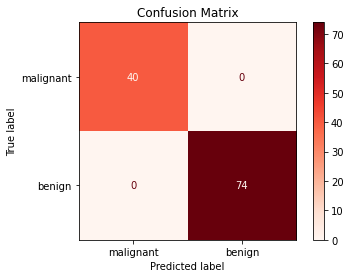

In [121]:
'''
Random Forest visualization
'''
label=['malignant', 'benign']
plot = plot_confusion_matrix(random_forest,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [122]:
'''
# SVM
'''
svm_model.fit(x_train, y_train)
y_predSVM = svm_model.predict(x_test)
accuracy = classification_report(y_test, y_predSVM)
matrix = confusion_matrix(y_test, y_predSVM)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

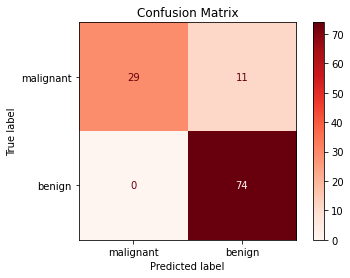

In [127]:
'''
SVM visualization
'''
label=['malignant', 'benign']
plot = plot_confusion_matrix(svm_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [128]:
'''
# SGD
'''
sgd_model.fit(x_train, y_train)
y_predSGD = sgd_model.predict(x_test)
accuracy = classification_report(y_test, y_predSGD)
matrix = confusion_matrix(y_test, y_predSGD)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       0.94      0.72      0.82        40
           1       0.87      0.97      0.92        74

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.89      0.88       114



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

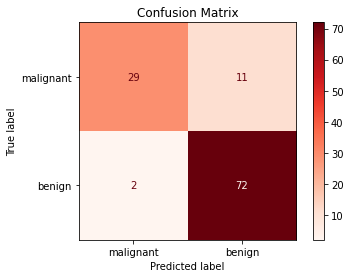

In [129]:
'''
SGD visualization
'''
label=['malignant', 'benign']
plot = plot_confusion_matrix(sgd_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')

In [130]:
'''
# Logistic Regression
'''
logistic_model.fit(x_train, y_train)
y_predLOG = logistic_model.predict(x_test)
accuracy = classification_report(y_test, y_predLOG)
matrix = confusion_matrix(y_test, y_predLOG)
print('                     <classification_report>')
print(accuracy)

                     <classification_report>
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\zzocojoa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

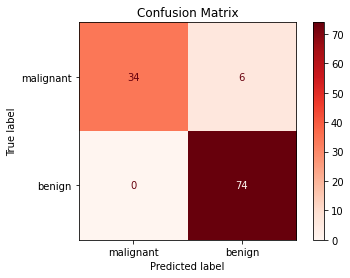

In [131]:
'''
Logistic visualization
'''
label=['malignant', 'benign']
plot = plot_confusion_matrix(logistic_model,
                            x_test, y_test,
                            display_labels=label,
                            cmap=plt.cm.Reds,
                            normalize=None)
plot.ax_.set_title('Confusion Matrix')